# Instruction to lab work # 3: Lazy learner k-Nearest Neighbour

> Student name    - Volodymyr

> Student surname - Donets

> Group           - KU-31

# Description of the work

## Theory
* [Lazy Learning Wiki](https://en.wikipedia.org/wiki/Lazy_learning)
* [k-Nearest Neighbour Wiki](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

### k-NN metrics:
* `n_neighbours` -- number neighbours to vote
* `p` -- the distance metric (Euclid Distance, Mahalanobis Distance, Manhattan Distance (L1), L2, cosine, and [other available metric could be found here](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html))






# Import dependencies

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt

# Some useful code

In [2]:
def plot_classifier_boundary(X, y, model=None, title=None, resolution=200):
    """
    Visualizes classifier decision boundaries using a high-resolution, evenly-spaced grid.

    If a model is provided, it plots the decision regions.
    If model is None, it only plots the data points.

    :param X: The feature matrix, shape (n_samples, 2).
    :param y: The true label vector, shape (n_samples,).
    :param model: A trained scikit-learn classifier object. Optional.
    :param title: The title for the plot. A default is used if None.
    :param resolution: The number of points to use per axis for the background grid.
    """
    plt.style.use('seaborn-v0_8-pastel')
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the background decision regions only if a model is provided
    if model is not None:
        # 1. Define the plot boundaries with a 10% padding
        x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
        x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
        x1_pad = (x1_max - x1_min) * 0.2
        x2_pad = (x2_max - x2_min) * 0.2
        plot_x1_min, plot_x1_max = x1_min - x1_pad, x1_max + x1_pad
        plot_x2_min, plot_x2_max = x2_min - x2_pad, x2_max + x2_pad

        # 2. Create a high-resolution, evenly-spaced grid of points
        xx1, xx2 = np.meshgrid(
            np.linspace(plot_x1_min, plot_x1_max, resolution),
            np.linspace(plot_x2_min, plot_x2_max, resolution)
        )
        
        # 3. Get the model's prediction for every point on the grid
        # We flatten the grid to pass it to the model, then reshape the predictions back
        grid_points = np.c_[xx1.ravel(), xx2.ravel()]
        Z = model.predict(grid_points)
        Z = Z.reshape(xx1.shape)
        
        # 4. Plot the regions using filled contours
        ax.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.6)

    # 5. Plot the original data points on top
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', alpha=1.0, zorder=2)

    # Set a dynamic title if none is provided
    if title is None:
        title = "Classifier Decision Boundary" if model is not None else "Data Scatter Plot"
    
    ax.set_xlabel("Feature 1", fontsize=12)
    ax.set_ylabel("Feature 2", fontsize=12)
    ax.set_title(title, fontsize=14, weight='bold')

    # --- Legend Creation ---
    handles, _ = scatter.legend_elements()
    num_classes = len(np.unique(y))
    class_labels = [f'Class {i}' for i in range(num_classes)]
    ax.legend(handles=handles, labels=class_labels, loc='upper right', fontsize=11)
    
    if model is not None:
        ax.set_xlim(plot_x1_min, plot_x1_max)
        ax.set_ylim(plot_x2_min, plot_x2_max)
    
    plt.show()

# Example of experiments

## 1. Toy example

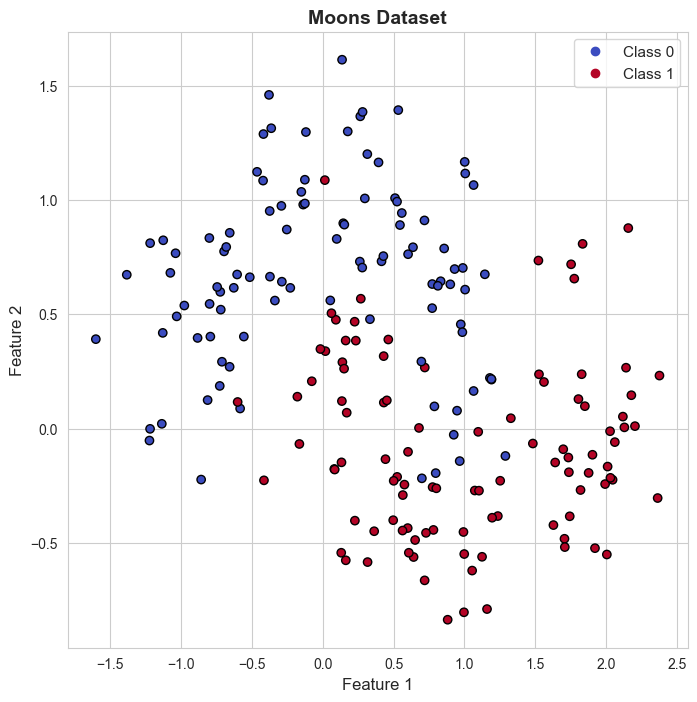

In [3]:
# 1. Generate a non-linearly separable "moons" dataset
X, y = make_moons(n_samples=200, noise=0.25, random_state=42)

# 2. Visualize the raw data to understand the challenge
plot_classifier_boundary(X, y, title="Moons Dataset")

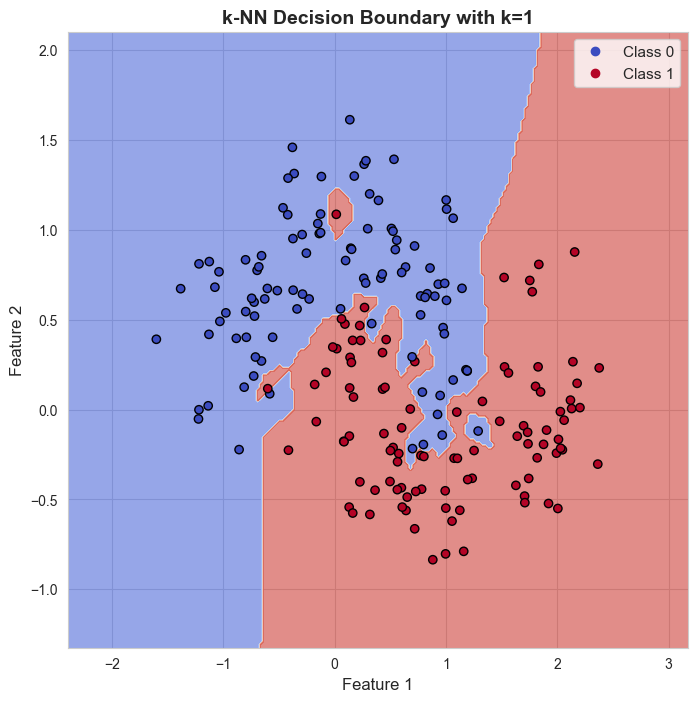

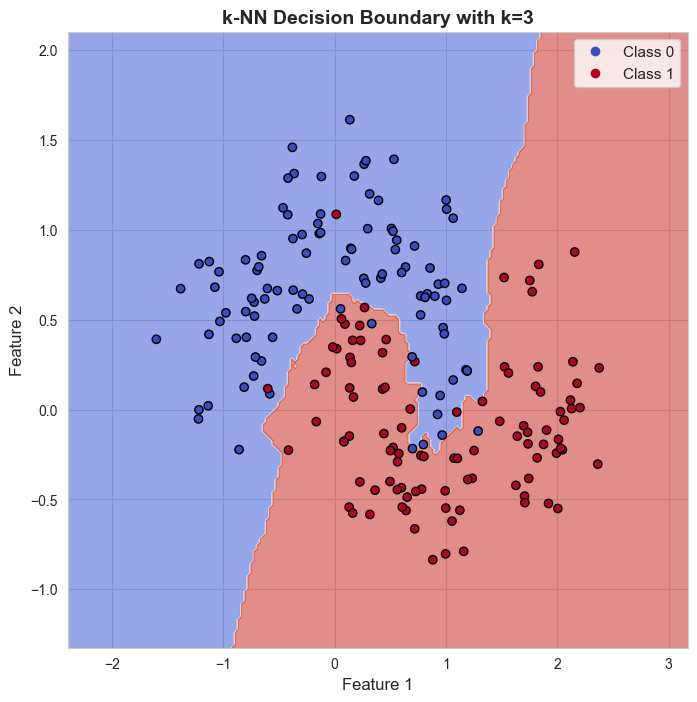

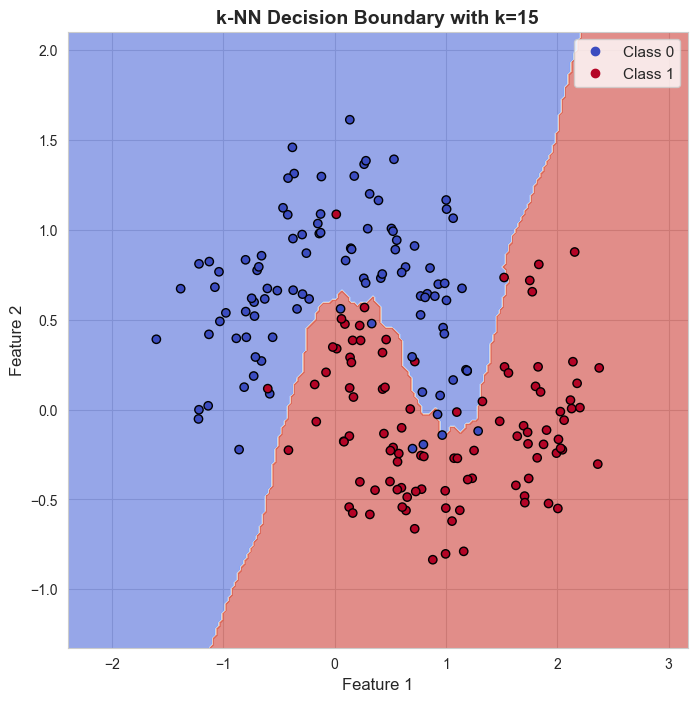

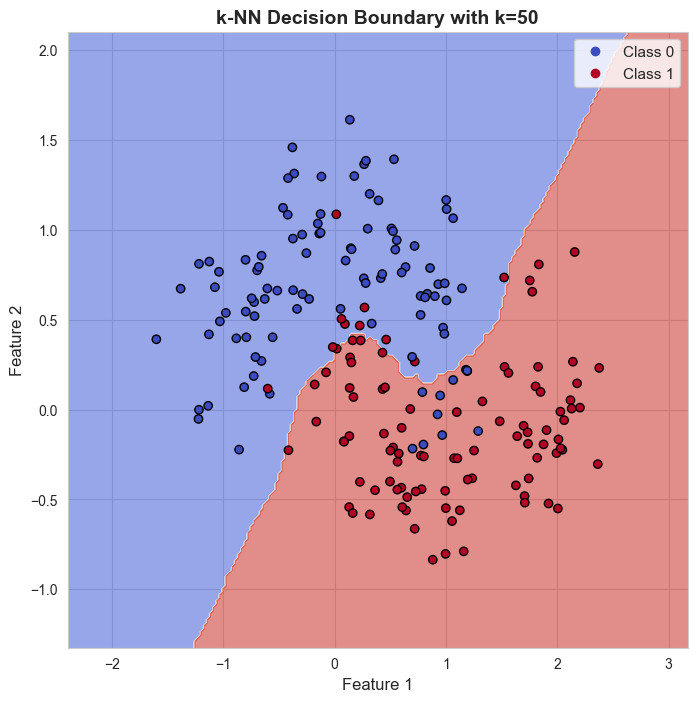

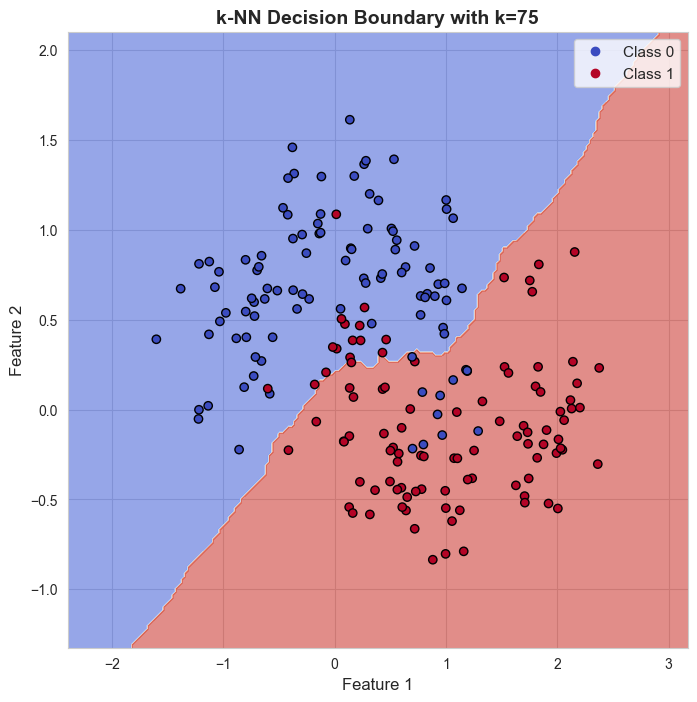

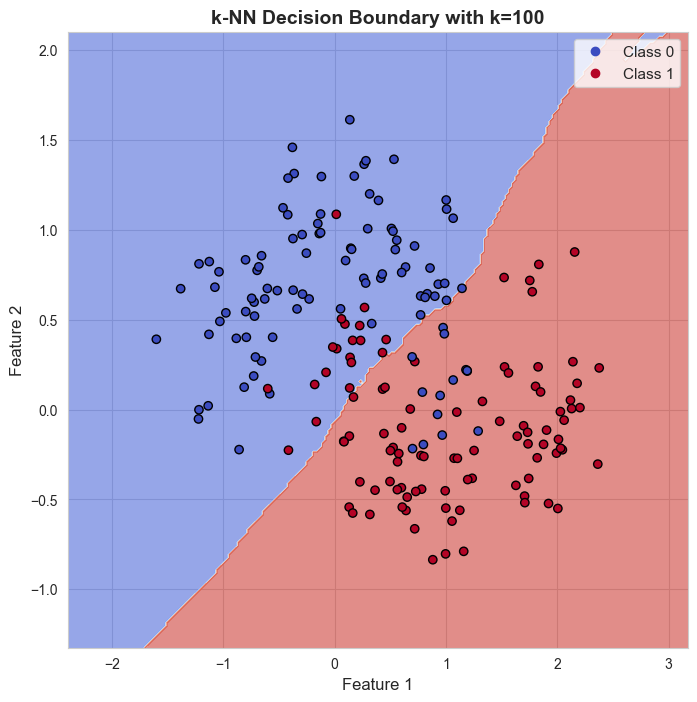

In [7]:
# A list of k values to experiment with
k_values = [1, 3, 15, 50, 75, 100]

for k in k_values:
    # Create and train the k-NN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X, y)
    
    # Visualize the decision boundary
    plot_classifier_boundary(X, y, model=knn_model, 
                               title=f"k-NN Decision Boundary with k={k}")

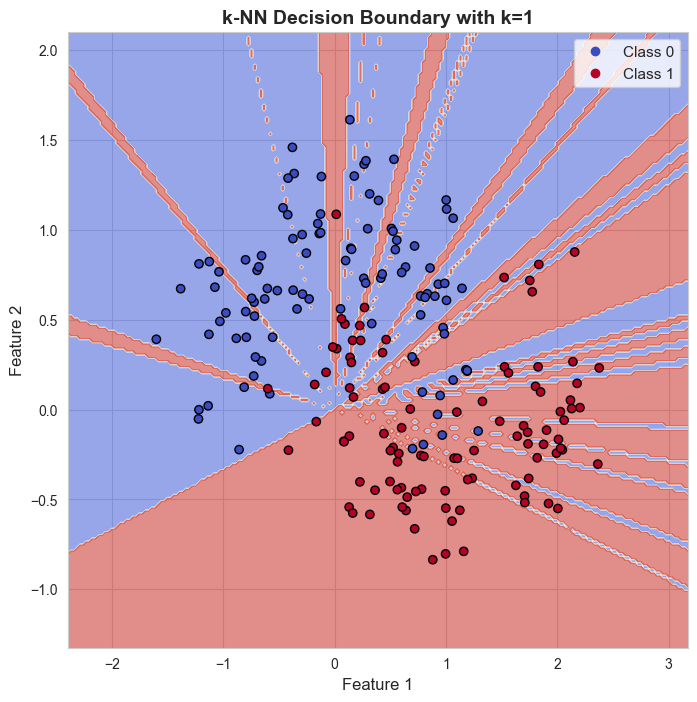

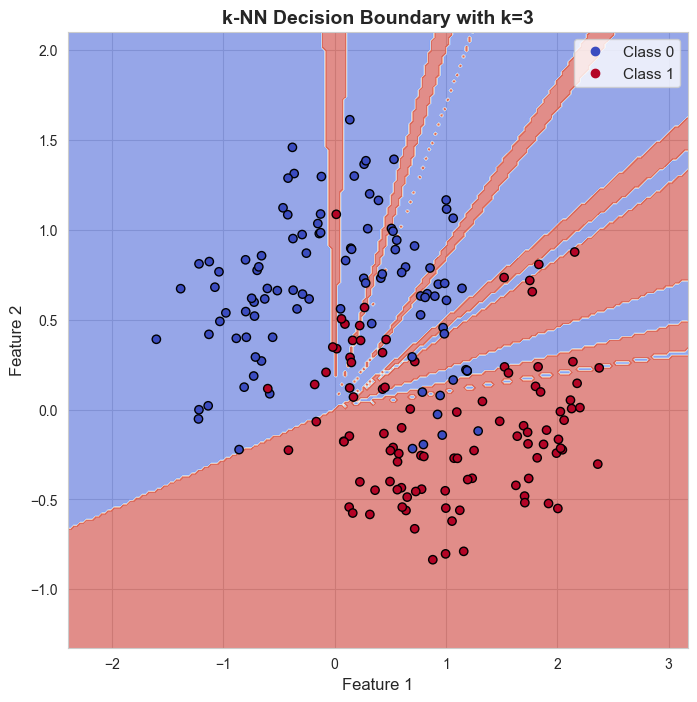

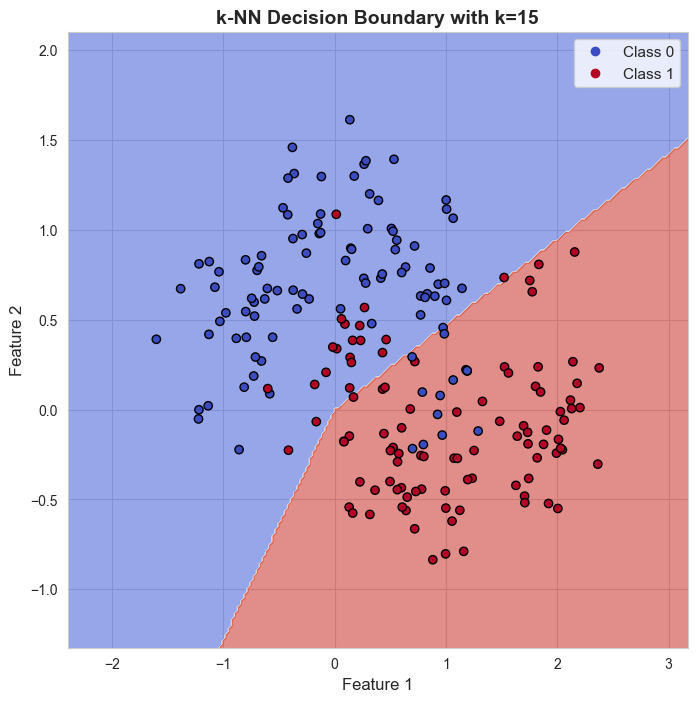

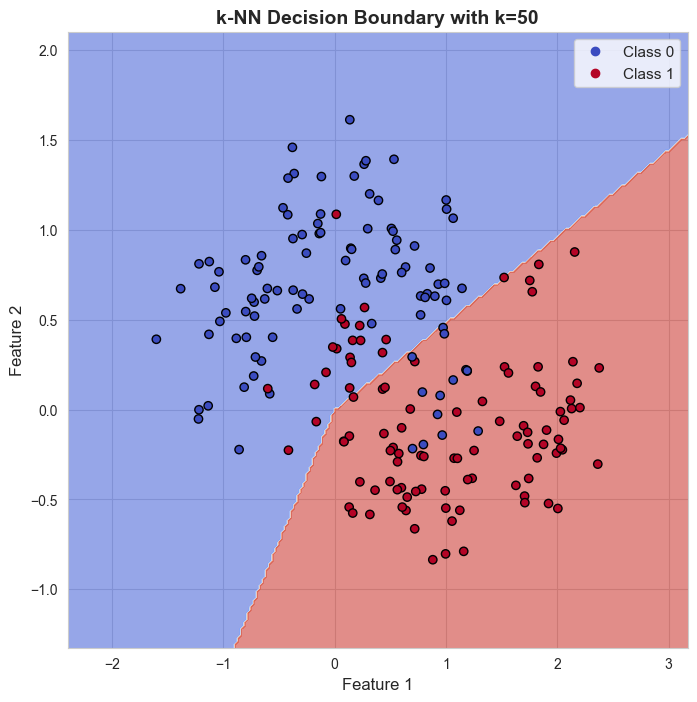

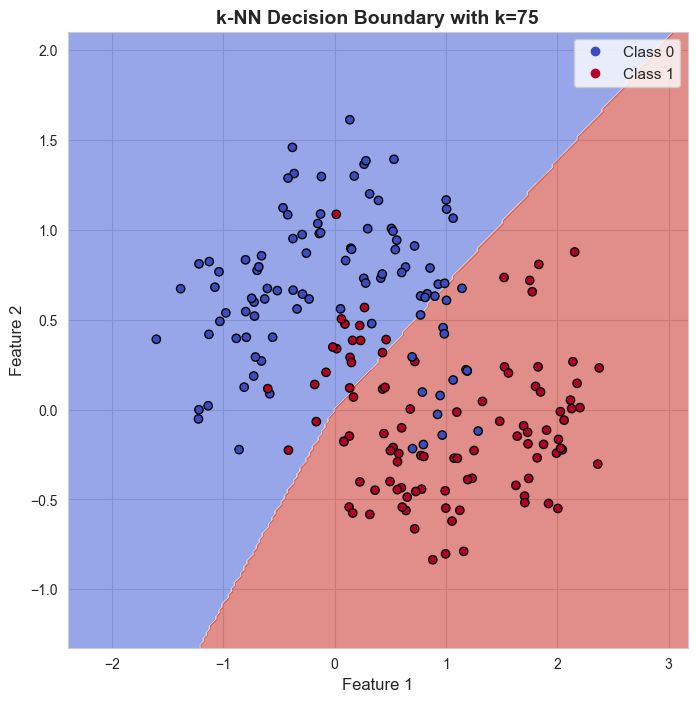

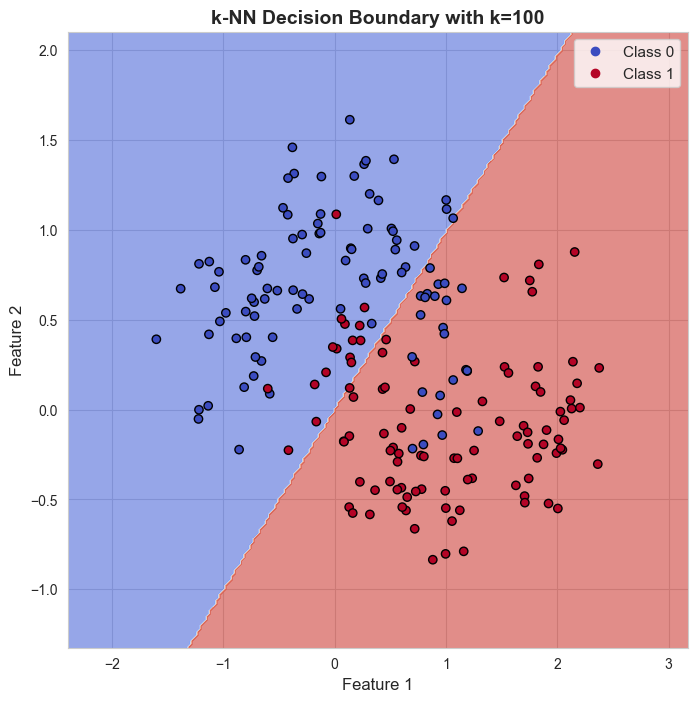

In [8]:
# A list of k values to experiment with
k_values = [1, 3, 15, 50, 75, 100]

for k in k_values:
    # Create and train the k-NN model
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn_model.fit(X, y)
    
    # Visualize the decision boundary
    plot_classifier_boundary(X, y, model=knn_model, 
                               title=f"k-NN Decision Boundary with k={k}")

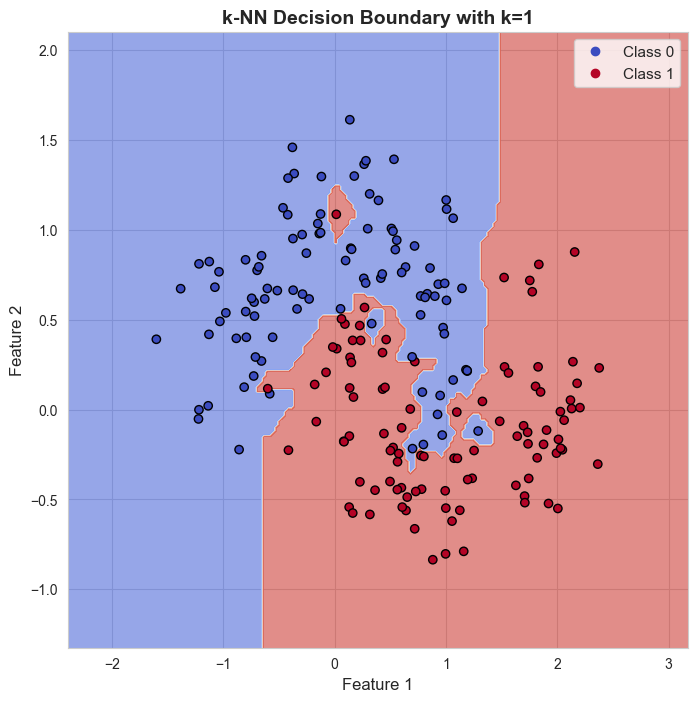

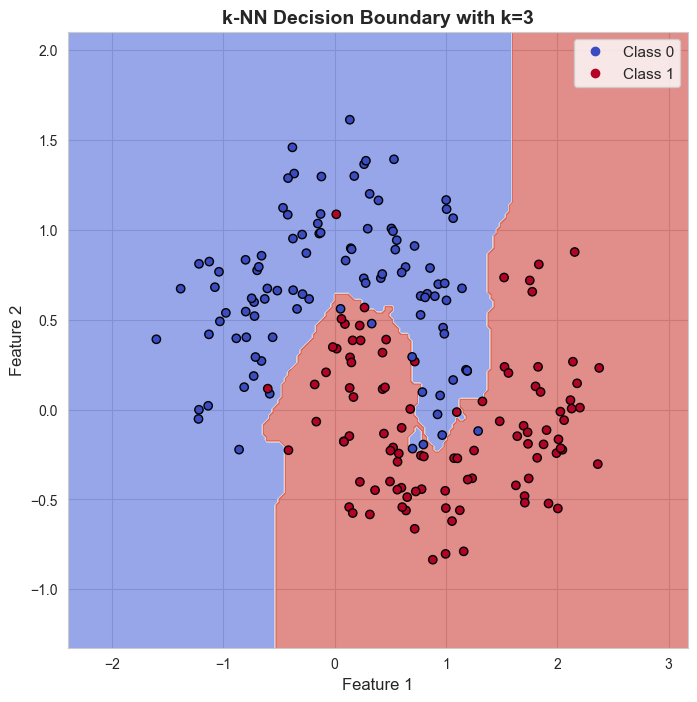

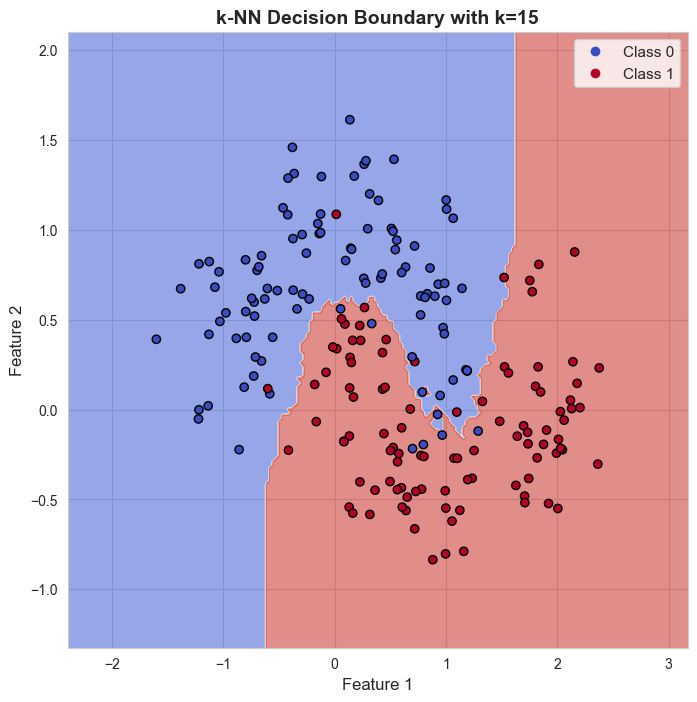

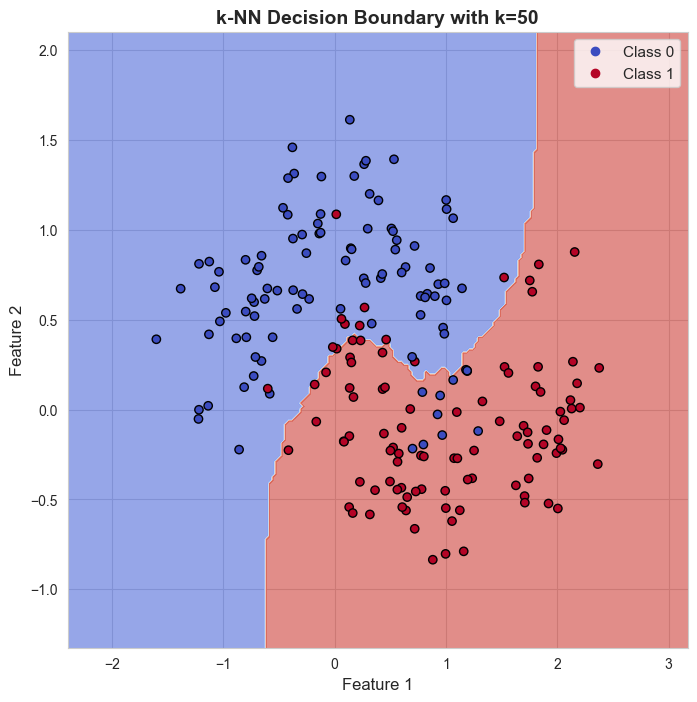

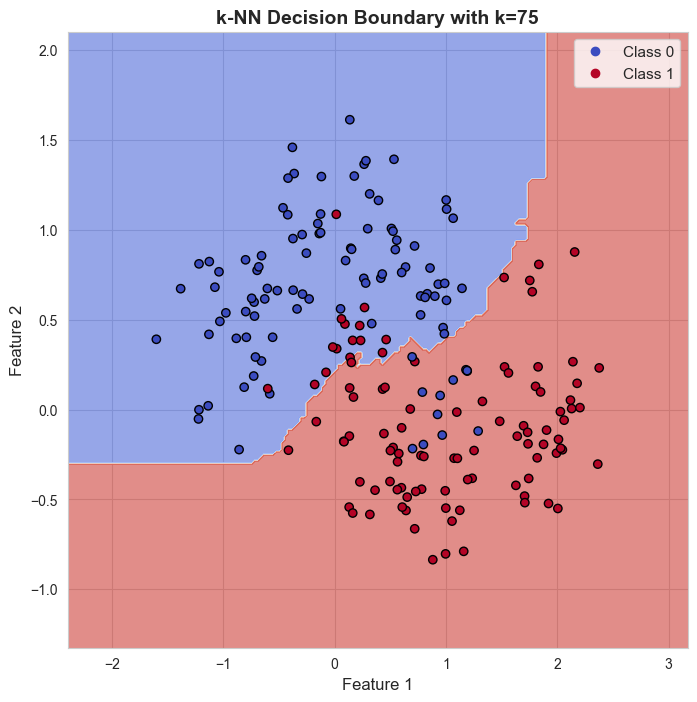

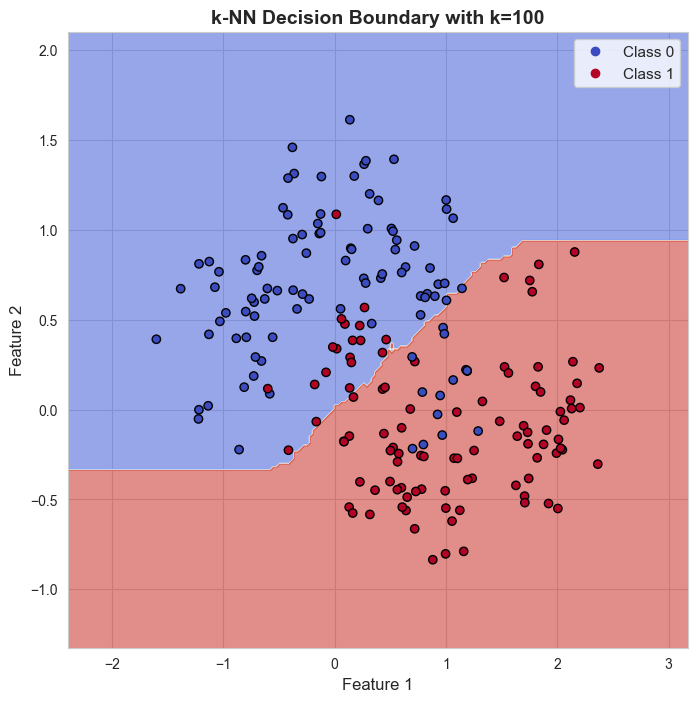

In [9]:
# A list of k values to experiment with
k_values = [1, 3, 15, 50, 75, 100]

for k in k_values:
    # Create and train the k-NN model
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_model.fit(X, y)
    
    # Visualize the decision boundary
    plot_classifier_boundary(X, y, model=knn_model, 
                               title=f"k-NN Decision Boundary with k={k}")

## 2. Real data example

# Own experiments on the selected data

# Conclusions